# SpaceX Assignment
---

# Import Python Libraries

In [610]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.options.mode.chained_assignment = None

# Data Collection

In [611]:
data = pd.read_csv("dataset.csv", na_values = "?")

# Data Exploration

In [612]:
data.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [613]:
data.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

In [614]:
#Shape of dataset
print("Number of Features: ", data.shape[1])
print("Number of Instances: ", data.shape[0])

Number of Features:  18
Number of Instances:  90


In [615]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [616]:
data.groupby('Class').size()

Class
0    30
1    60
dtype: int64

In [617]:
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

## Categorical Features Analysis

In [618]:
cat_data = data.select_dtypes(include= object)
cat_data.head()

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,LandingPad,Serial
0,2010-06-04,Falcon 9,LEO,CCAFS SLC 40,None None,NaN,B0003
1,2012-05-22,Falcon 9,LEO,CCAFS SLC 40,None None,NaN,B0005
2,2013-03-01,Falcon 9,ISS,CCAFS SLC 40,None None,NaN,B0007
3,2013-09-29,Falcon 9,PO,VAFB SLC 4E,False Ocean,NaN,B1003
4,2013-12-03,Falcon 9,GTO,CCAFS SLC 40,None None,NaN,B1004


In [619]:
cat_data.select_dtypes('object').nunique()

Date              90
BoosterVersion     1
Orbit             11
LaunchSite         3
Outcome            8
LandingPad         5
Serial            53
dtype: int64

As we can observe, the date feature has been stored as object data type and later needs to be converted into date type. Also, since the BoosterVersion feature only has one value, we can remove this feature entirely.

In [620]:
for col in cat_data.columns:
        print(col,":")
        print(cat_data[col].value_counts(), "\n")

Date :
2010-06-04    1
2019-08-06    1
2019-06-12    1
2019-05-24    1
2019-05-04    1
             ..
2017-03-30    1
2017-03-16    1
2017-02-19    1
2017-01-14    1
2020-11-05    1
Name: Date, Length: 90, dtype: int64 

BoosterVersion :
Falcon 9    90
Name: BoosterVersion, dtype: int64 

Orbit :
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64 

LaunchSite :
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64 

Outcome :
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64 

LandingPad :
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64 

Serial :
B1049    6
B1051    5
B1059    4
B1056    4


From observing the categorical data, we can see that there are only nominal features in this dataset. For nominal features, we can simply use one hot encoding as we do not need to reserve the order unlike ordinal features. For the feature Serial, it has 53 unique value which would drastically increase the size after we apply one hot encoding.

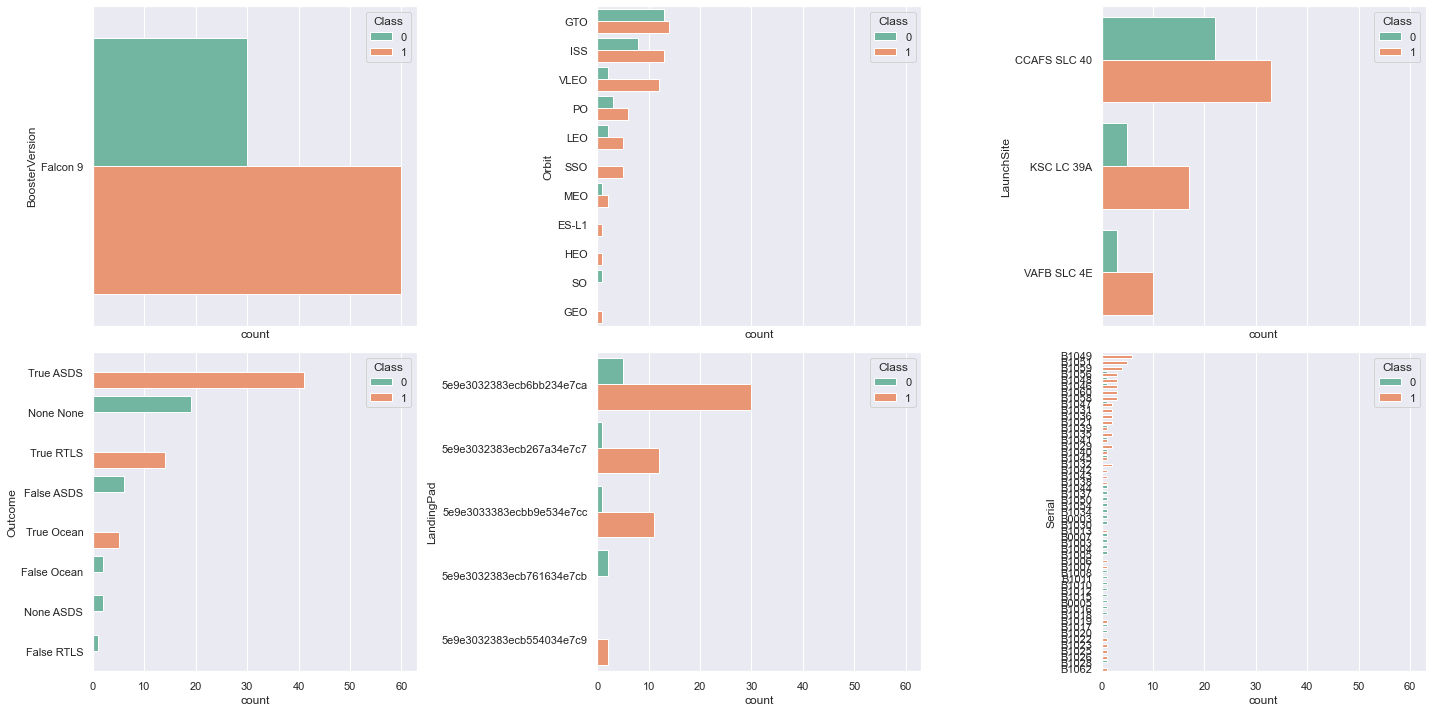

In [621]:
df = cat_data.drop(['Date'], axis=1)

fig, axes =plt.subplots(2,3, figsize=(20,10), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, df):
    sns.countplot(y=col, hue='Class', data=data, ax=ax, order = df[col].value_counts().index, palette='Set2')

plt.tight_layout()  
plt.show()

From the visualization above, we can observe that most of the features except Serial have quite a good correlation with the output class. Upon taking a closer look at Serial, it is very diverse and many of them hold less amount of decision as compared to other features.

## Numerical Features Analysis

In [622]:
data.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


### Skewness

In [623]:
skewPayloadMass = data.PayloadMass.skew(axis = 0, skipna = True)
print('PayloadMass skewness: ', skewPayloadMass)

PayloadMass skewness:  0.9883780294513994


<AxesSubplot:xlabel='PayloadMass', ylabel='Density'>

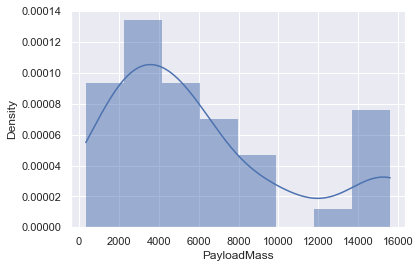

In [624]:
sns.histplot(data=data, x="PayloadMass", kde=True, stat="density", linewidth=0)

In [625]:
skewFlights = data.Flights.skew(axis = 0, skipna = True)
print('Flights skewness: ', skewFlights)

Flights skewness:  1.7299868012565818


<AxesSubplot:xlabel='Flights', ylabel='Density'>

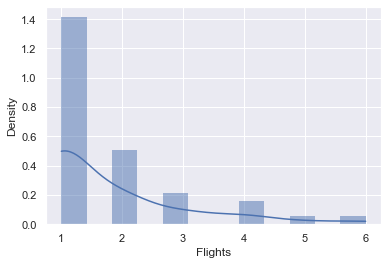

In [626]:
sns.histplot(data=data, x="Flights", kde=True, stat="density", linewidth=0)

In [627]:
skewReusedCount = data.ReusedCount.skew(axis = 0, skipna = True)
print('ReusedCount skewness: ', skewReusedCount)

ReusedCount skewness:  0.8032591901966765


<AxesSubplot:xlabel='ReusedCount', ylabel='Density'>

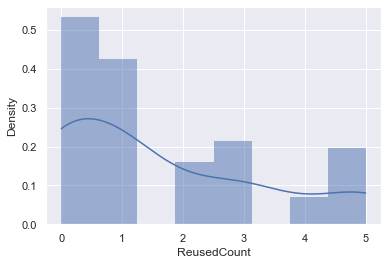

In [628]:
sns.histplot(data=data, x="ReusedCount", kde=True, stat="density", linewidth=0)

In [629]:
skewBlock = data.Block.skew(axis = 0, skipna = True)
print('ReusedCount skewness: ', skewBlock)

ReusedCount skewness:  -0.5264601162161819


<AxesSubplot:xlabel='Block', ylabel='Density'>

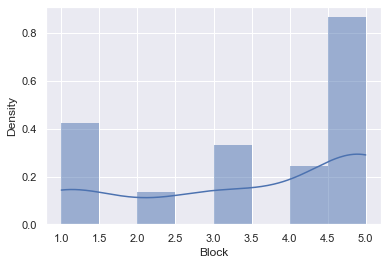

In [630]:
sns.histplot(data=data, x="Block", kde=True, stat="density", linewidth=0)

## Correlation

1. Gives quantifiable relationship between features
2. Corr is calculated using various methods like 'pearson', 'spearman', etc.
3. Corr can be represented using correlation heatmap

In [631]:
data.corr()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.055256,-0.054194,0.401923
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.016181,-0.014655,0.199992
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.085228,-0.084547,0.149787
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,-0.143677,0.144427,0.642540
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.042160,0.042669,0.207582
Legs,0.373619,0.192318,0.157727,0.902302,0.155552,1.000000,0.368994,0.375496,-0.057701,0.058161,0.673825
Block,0.932411,0.518165,0.519603,0.438023,0.548036,0.368994,1.000000,0.743340,-0.030037,0.031621,0.416015
ReusedCount,0.735193,0.612327,0.684802,0.410324,0.594109,0.375496,0.743340,1.000000,-0.101877,0.102668,0.466584
Longitude,0.055256,0.016181,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,-0.101877,1.000000,-0.999966,-0.089519
Latitude,-0.054194,-0.014655,-0.084547,0.144427,0.042669,0.058161,0.031621,0.102668,-0.999966,1.000000,0.090782


Text(0.5, 1.0, '- Correlation matrix and Heatmap -')

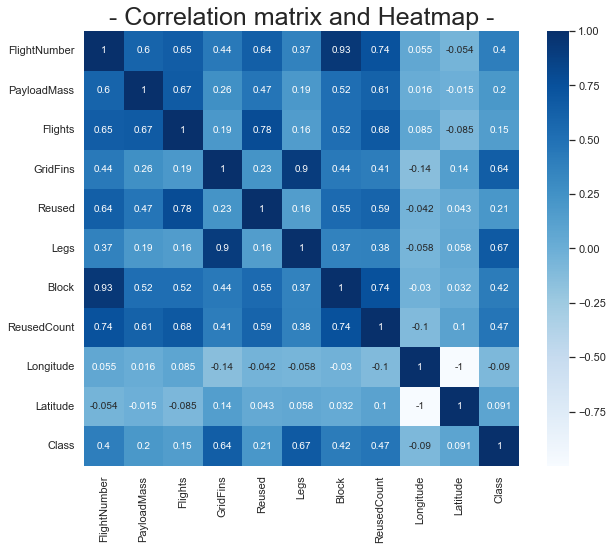

In [632]:
plt.figure(figsize =(10,8))
corrmat = data.corr()
sns.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="Blues");  #Blues
plt.title('- Correlation matrix and Heatmap -',fontsize = 25)

FlightNumber and Block, GridFins and Legs both have strong positive correlation. Hence, we can decide on a later point choose either one feature from each pair and drop it.

---
# Data Visualization

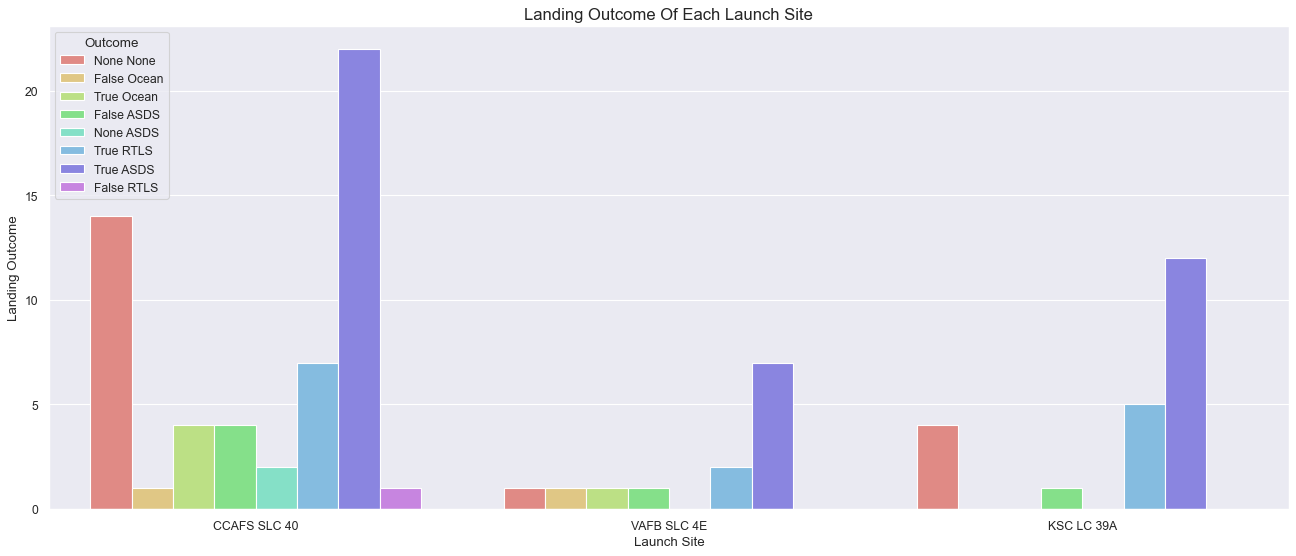

In [633]:
# Visualize the landing outcome of each launch site to know which launch side had the most successful landings 

plt.figure(figsize = (20,8), dpi = 80)
sns.countplot(x = "LaunchSite", data = data, hue = "Outcome", palette = sns.hls_palette(9,l=.7,s=.8));
plt.title("Landing Outcome Of Each Launch Site", fontsize = 15)
plt.xlabel("Launch Site")
plt.ylabel("Landing Outcome")
plt.show()

<Figure size 1600x640 with 0 Axes>

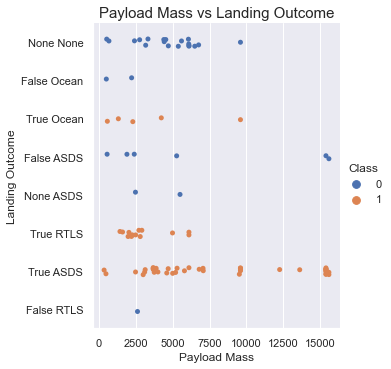

In [634]:
# Visualize the relationship between payload mass and landing outcome

x = data.loc[:,"PayloadMass"]
y = data.loc[:,"Outcome"]

plt.figure(figsize = (20,8), dpi = 80)
# sns.palplot(sns.hls_palette(9,l=.7,s=.8))
# plt.scatter(x,y)
# sns.catplot(x='PayloadMass',y='Orbit',data=data,hue='Class')

sns.catplot(x = 'PayloadMass',y = 'Outcome',data = data,hue = 'Class')

plt.title("Payload Mass vs Landing Outcome", fontsize = 15)
plt.xlabel("Payload Mass")
plt.ylabel("Landing Outcome")
plt.show()

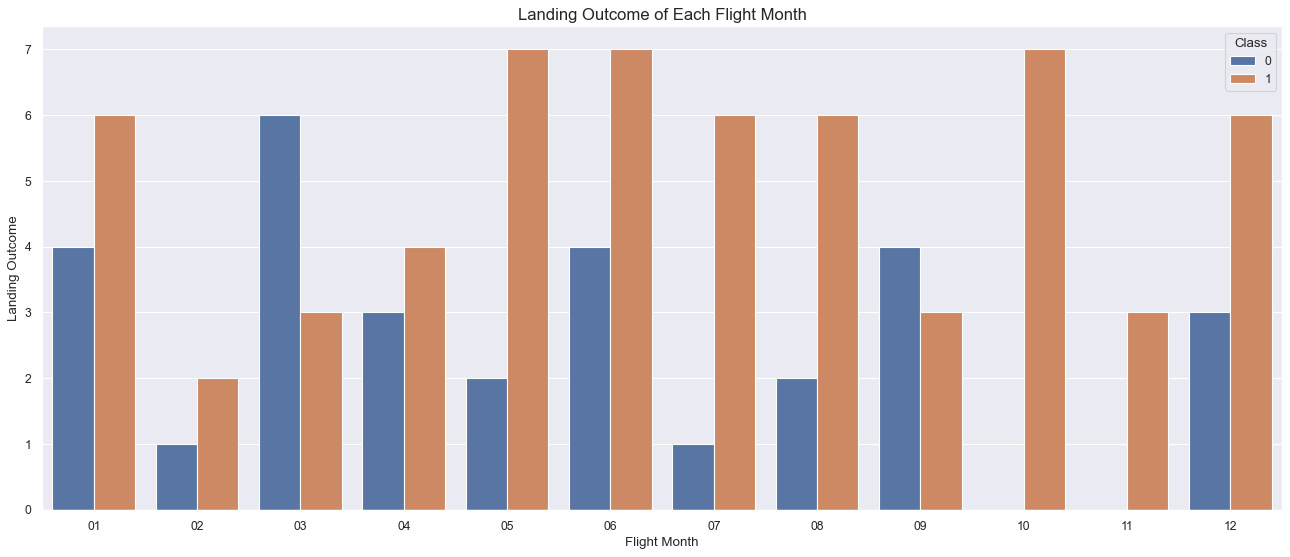

In [635]:
# Visualize the relationship between the flight month and the landing outcome

date = data.loc[:, "Date"]
flight_month = []

for i in date:
    flight_month.append(i.split("-")[1])
flight_month_df = pd.DataFrame(flight_month, columns = ["Month"])

data_copy = data.copy(deep = False)
data_copy["Date"] = flight_month_df
plt.figure(figsize = (20,8), dpi = 80)
sns.countplot(x = "Date", data = data_copy, hue = "Class", order = ['01','02','03','04','05','06','07','08','09','10','11','12'])
plt.title("Landing Outcome of Each Flight Month", fontsize = 15)
plt.xlabel("Flight Month")
plt.ylabel("Landing Outcome")
plt.show()


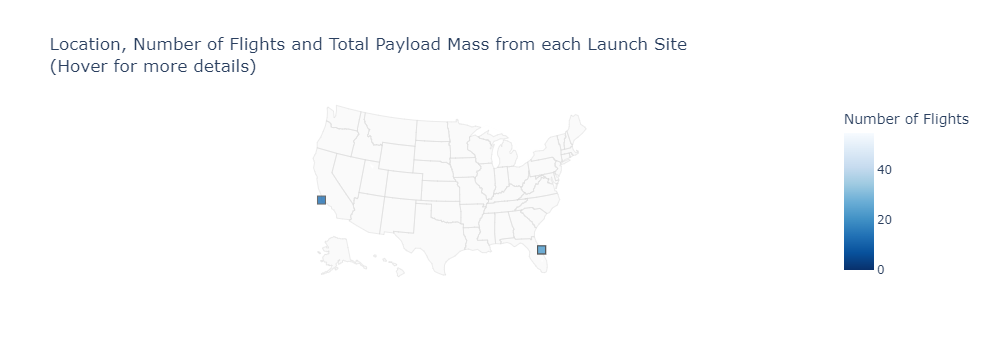

In [636]:
visual = data.groupby(['LaunchSite','Longitude','Latitude']).count().reset_index()
visual['TotalMass'] = data.groupby(['LaunchSite','Longitude','Latitude']).sum().reset_index()['PayloadMass'] 
visual['text'] = 'Launch Site: ' + visual['LaunchSite'] + '<br>Number of Flights: ' + visual['Flights'].astype(str) + '<br>Total Payload Mass: ' + visual['TotalMass'].astype(int).astype(str)

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = visual['Longitude'],
        lat = visual['Latitude'],
        text = visual['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = visual['Flights'],
            cmax = visual['Flights'].max(),
            colorbar_title="Number of Flights"
        )))

fig.update_layout(
        title = 'Location, Number of Flights and Total Payload Mass from each Launch Site<br>(Hover for more details)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig.show()

Text(0, 0.5, 'Number of Reused Parts')

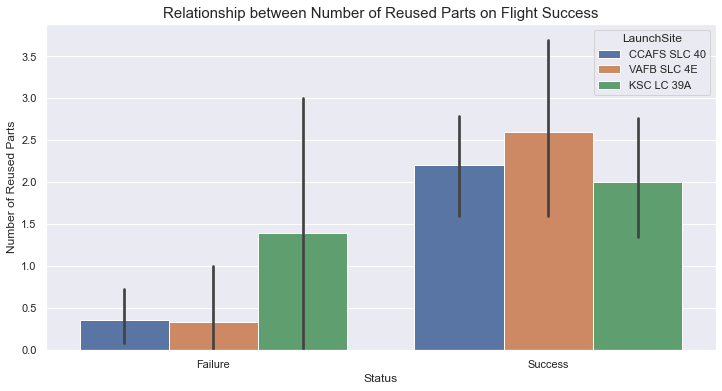

In [637]:
vis = data.copy()
vis['Status'] = data['Class'].apply(lambda x: 'Success' if x == 1 else 'Failure')

plt.figure(figsize=(12,6))

ax = sns.barplot(x='Status',
                 y='ReusedCount',
                 data=vis, 
                 hue='LaunchSite')

plt.title('Relationship between Number of Reused Parts on Flight Success', fontsize=15)
plt.ylabel('Number of Reused Parts')

Text(0.5, 0, 'Orbits')

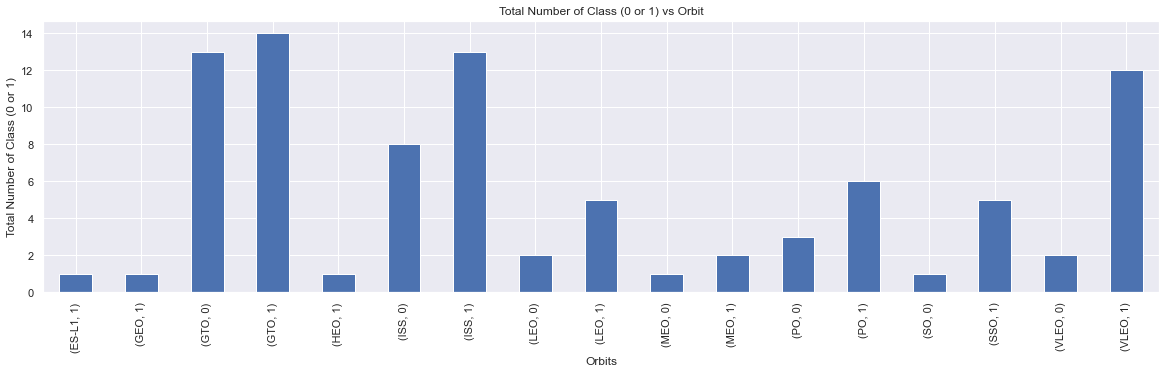

In [638]:
df_new = data.groupby(['Orbit', 'Class'])['Class'].count()
df_new.plot(kind='bar', figsize=(20, 5))
plt.title('Total Number of Class (0 or 1) vs Orbit')
plt.ylabel('Total Number of Class (0 or 1)')
plt.xlabel('Orbits')

Text(0, 0.5, 'Payload Mass')

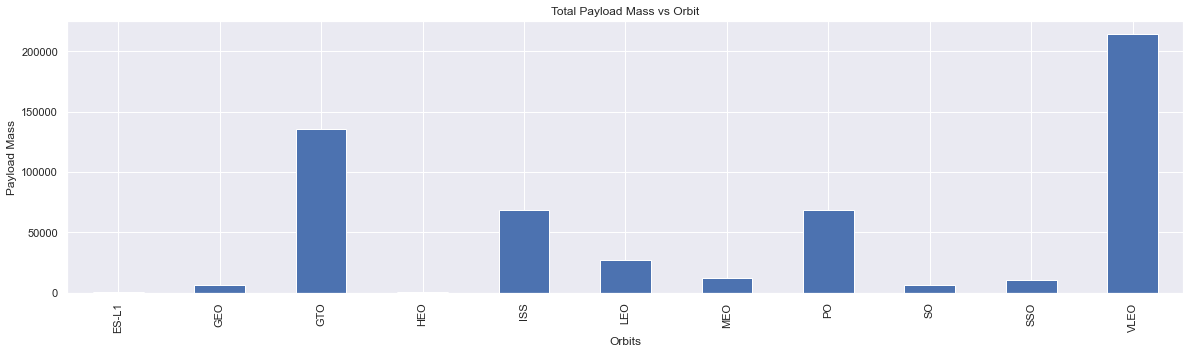

In [639]:
df_new1 = data.groupby(['Orbit'])['PayloadMass'].sum()
df_new1.plot(kind='bar', figsize=(20, 5))
plt.title('Total Payload Mass vs Orbit')
plt.xlabel('Orbits')
plt.ylabel('Payload Mass')

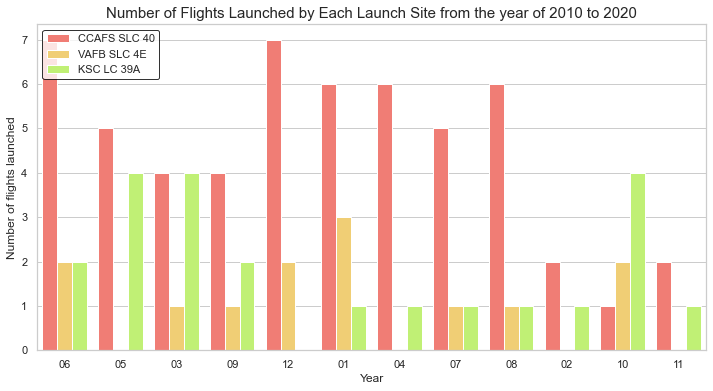

In [640]:
#Visualization of the number of flights launched by each launch site in each year

#Obtain "Year" values from the date of each flight
def get_year():
    for i in df['Date']:
        year.append(i.split("-")[0])
    return year
   
year = []
df = data.copy()
year = get_year()
df['Date'] = year
#df.head()


plt.figure(figsize = (12,6))
sns.set(style="whitegrid")
sns.countplot(x = 'Date', 
              data = df,
              hue = 'LaunchSite', 
              palette = sns.hls_palette(9,l=.7,s=.8), saturation = 1.5)


plt.title('Number of Flights Launched by Each Launch Site from the year of 2010 to 2020', fontsize = 15)
plt.ylabel('Number of flights launched')
plt.xlabel('Year')
#plt.legend(loc='upper left', frameon=True)
leg = plt.legend(loc='upper left')
leg.get_frame().set_edgecolor('black')
plt.show()

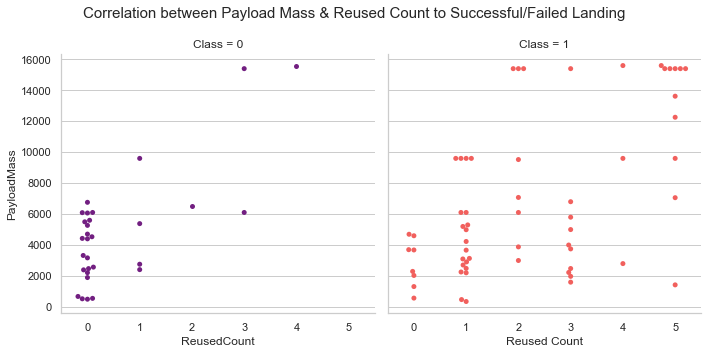

In [641]:
sns.catplot(x='ReusedCount', 
            y='PayloadMass', 
            data=data, 
            hue='Class',  
            col='Class',  
            kind='swarm', 
            palette = 'magma')

#sns.displot(x = 'ReusedCount', data = data[data.ReusedCount.isin([1,2,3,4,5])],
            #col = 'Class', row = 'ReusedCount',
            #hue = 'Orbit', palette = 'colorblind')
            #facet_kws={'despine': True}

plt.subplots_adjust(top = 0.85)
plt.suptitle('Correlation between Payload Mass & Reused Count to Successful/Failed Landing', fontsize = 15)
plt.ylabel('Payload Mass')
plt.xlabel('Reused Count')
#plt.legend(loc='lower right')
plt.show()

Text(0, 0.5, 'Total Number')

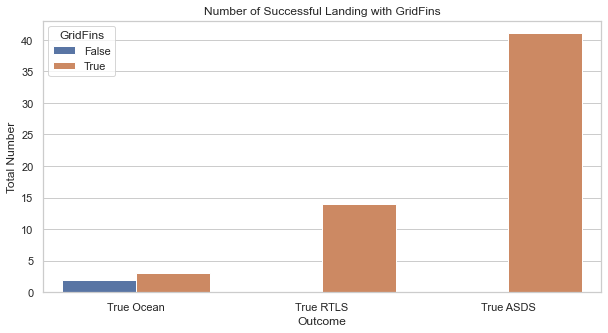

In [642]:
data1 = df.loc[df['Outcome'].isin(['True Ocean','True ASDS','True RTLS'])]
#data1.head()
#total = data1.GridFins.count()
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

vs1 = sns.countplot( data=data1,x='Outcome',hue='GridFins')

plt.title('Number of Successful Landing with GridFins')
plt.ylabel('Total Number')

Text(0.5, 0, 'Landing Pad Code')

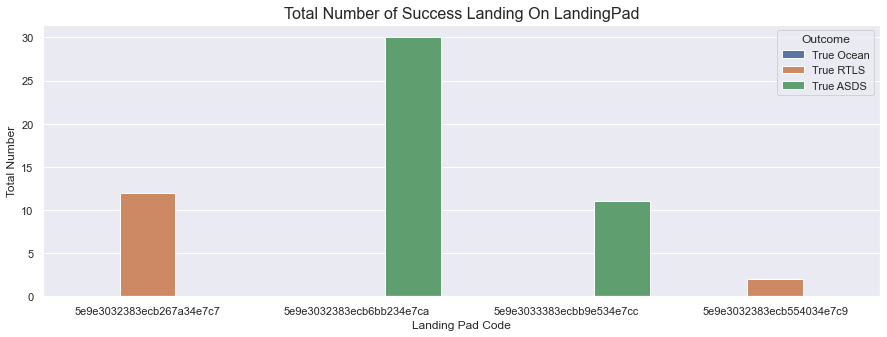

In [643]:
#Visualization of Successful Landing on Landing Pad
sns.set(style="darkgrid")

plt.figure(figsize=(15,5))

vs1 = sns.countplot(x = 'LandingPad',data=data1,hue='Outcome')

plt.title('Total Number of Success Landing On LandingPad',fontsize = 16)
plt.ylabel('Total Number')
plt.xlabel('Landing Pad Code')

---
# Object Queries

1) To find out how many times the core with specified serial number has been reused

In [644]:
data.groupby(['Serial']).sum()['ReusedCount']

Serial
B0003     0
B0005     0
B0007     0
B1003     0
B1004     0
B1005     0
B1006     0
B1007     0
B1008     0
B1010     0
B1011     0
B1012     0
B1013     0
B1015     0
B1016     0
B1017     0
B1018     0
B1019     0
B1020     0
B1021     2
B1022     0
B1023     1
B1025     1
B1026     0
B1028     0
B1029     2
B1030     0
B1031     2
B1032     2
B1034     0
B1035     2
B1036     2
B1037     0
B1038     1
B1039     2
B1040     2
B1041     2
B1042     0
B1043     1
B1044     0
B1045     2
B1046    12
B1047     6
B1048    16
B1049    30
B1050     0
B1051    25
B1054     0
B1056    12
B1058     6
B1059    12
B1060     6
B1062     0
Name: ReusedCount, dtype: int64

2) To determine the total payload mass for each launch site

In [645]:
#data.groupby(['LaunchSite']).sum()['PayloadMass']
df = data.copy()
oq2 = df.groupby(['LaunchSite']).sum()
print(oq2[['PayloadMass']])

                PayloadMass
LaunchSite                 
CCAFS SLC 40  305151.428235
KSC LC 39A    167341.918824
VAFB SLC 4E    76953.000000


3) To find the outcome with using grid fins

In [646]:
data.groupby(['Outcome']).sum()['GridFins']

Outcome
False ASDS      6
False Ocean     0
False RTLS      1
None ASDS       2
None None       3
True ASDS      41
True Ocean      3
True RTLS      14
Name: GridFins, dtype: int64

4) To determine the total number of successful landing for each orbit type

In [647]:
data.groupby(['Orbit']).sum()['Class']

Orbit
ES-L1     1
GEO       1
GTO      14
HEO       1
ISS      13
LEO       5
MEO       2
PO        6
SO        0
SSO       5
VLEO     12
Name: Class, dtype: int64

5) To determine the total payload mass carried out by boosters launch by Nasa (CRS)

In [649]:
data.groupby(['BoosterVersion']).sum()['PayloadMass']

BoosterVersion
Falcon 9    549446.347059
Name: PayloadMass, dtype: float64

---
# Data Preprocessing (Numerical Data)

In [517]:
data.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


## Removed Output Vector

Class is our output vector and it will be removed for now, and added to the final training and test set.

In [518]:
data["Class"] = data["Class"].astype("bool")
ori_data = data.copy()
data.drop('Class', axis=1, inplace=True)

## Select Numerical Features

In [519]:
num_data = data.select_dtypes(include = {int, float})
num_data.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
0,1,6104.959412,1,1.0,0,-80.577366,28.561857
1,2,525.000000,1,1.0,0,-80.577366,28.561857
2,3,677.000000,1,1.0,0,-80.577366,28.561857
3,4,500.000000,1,1.0,0,-120.610829,34.632093
4,5,3170.000000,1,1.0,0,-80.577366,28.561857


## Feature Selection

As the FlightNumber feature is essentially an index column, it would not be useful to include this feature. Longitude and Latitude can be represented by LaunchSite. Hence, these two features are also dropped.

In [520]:
num_data.drop(["FlightNumber","Longitude","Latitude"], axis = 1, inplace = True)
num_data.head(5)

,PayloadMass,Flights,Block,ReusedCount
0,6104.959412,1,1.0,0
1,525.000000,1,1.0,0
2,677.000000,1,1.0,0
3,500.000000,1,1.0,0
4,3170.000000,1,1.0,0


## Check for Missing Value

In [521]:
num_data.isnull().sum()

PayloadMass    0
Flights        0
Block          0
ReusedCount    0
dtype: int64

## Outliers

As we can observe from the boxplot below, there are some outliers in the Flights feature. There are no outliers for the remaining three features.

<AxesSubplot:>

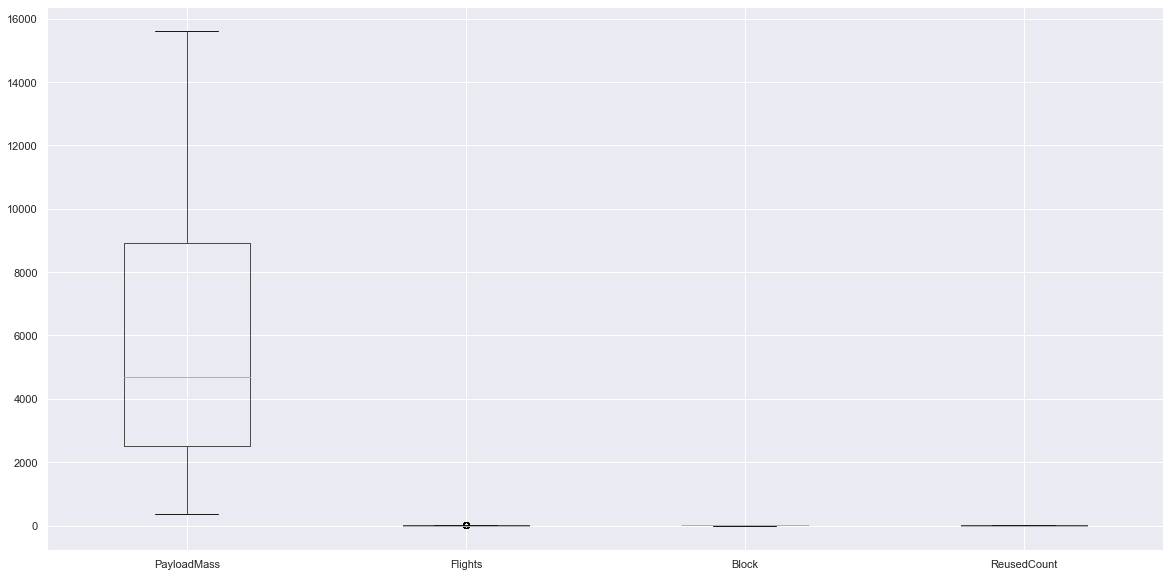

In [522]:
num_data.boxplot(figsize=(20,10))

In [523]:
Z = (num_data-num_data.mean())/num_data.std()
Z.describe()

,PayloadMass,Flights,Block,ReusedCount
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,-2.652199e-16,-6.784696e-16,1.208910e-16,4.280527e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.225849e+00,-6.502698e-01,-1.567115e+00,-9.680173e-01
25%,-7.655933e-01,-6.502698e-01,-9.402691e-01,-9.680173e-01
50%,-2.989473e-01,-6.502698e-01,3.134230e-01,-3.833089e-01
75%,5.980803e-01,1.740159e-01,9.402691e-01,7.861080e-01
max,2.022514e+00,3.471159e+00,9.402691e-01,1.955525e+00


In [524]:
print('Number of rows before discarding outliers = %d' % (data.shape[0]))

z_scores = stats.zscore(num_data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <= 3).all(axis=1)
#We only selected the z score less than equal to 3 and more than -3

data = data[filtered_entries]
num_data = data[['PayloadMass','Flights','Block','ReusedCount']]

print('Number of rows after discarding outliers = %d' % data.shape[0])

Number of rows before discarding outliers = 90
Number of rows after discarding outliers = 88


## Duplicate Data

In [525]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


## Perform Standardization

In [526]:
num_data_std = StandardScaler().fit_transform(num_data)

In [527]:
print('Mean:\n',num_data_std.mean (axis=0))
print('\nStandard Deviation:\n',num_data_std.std (axis=0))

Mean:
 [ 1.21115239e-16  2.52323415e-17  8.07434927e-17 -5.04646829e-18]

Standard Deviation:
 [1. 1. 1. 1.]


## Train Test Split

In [528]:
# Load the python library of sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing data set
num_train, num_test = train_test_split(num_data, test_size = 0.2, random_state = 2)

## Finalize Numerical Training and Test Set

In [529]:
print('Original Dataset Shape: ', num_data.shape)

print("Shape of Numerical training dataset: {}".format(num_train.shape))
print("Shape of Numerical testing dataset: {}".format(num_test.shape))

Original Dataset Shape:  (88, 4)
Shape of Numerical training dataset: (70, 4)
Shape of Numerical testing dataset: (18, 4)


---
# Data Preprocessing (Categorical Data)

## Find Categorical Data

In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    88 non-null     int64  
 1   Date            88 non-null     object 
 2   BoosterVersion  88 non-null     object 
 3   PayloadMass     88 non-null     float64
 4   Orbit           88 non-null     object 
 5   LaunchSite      88 non-null     object 
 6   Outcome         88 non-null     object 
 7   Flights         88 non-null     int64  
 8   GridFins        88 non-null     bool   
 9   Reused          88 non-null     bool   
 10  Legs            88 non-null     bool   
 11  LandingPad      62 non-null     object 
 12  Block           88 non-null     float64
 13  ReusedCount     88 non-null     int64  
 14  Serial          88 non-null     object 
 15  Longitude       88 non-null     float64
 16  Latitude        88 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

### Data Format Correction

In [531]:
data["Class"] = ori_data["Class"].astype("bool")
cat_data = data.select_dtypes(include = {object, bool})
cat_data.head()

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
0,06,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003,False
1,05,Falcon 9,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005,False
2,03,Falcon 9,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007,False
3,09,Falcon 9,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003,False
4,12,Falcon 9,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004,False


## Selecting Data

In [532]:
cat_data.nunique()

Date              12
BoosterVersion     1
Orbit             11
LaunchSite         3
Outcome            8
GridFins           2
Reused             2
Legs               2
LandingPad         5
Serial            53
Class              2
dtype: int64

### Select Low Variance Data

Since the BoosterVersion feature has only one value, we decided to drop the BoosterVersion feature which is not relevant to our data mining goal

In [533]:
cat_data.drop("BoosterVersion", axis = 1, inplace = True)
cat_data.head(5)

,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
0,06,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003,False
1,05,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005,False
2,03,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007,False
3,09,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003,False
4,12,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004,False


## Split Data

Split data into training and testing data set.

In [534]:
# Load the python library of sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing data set
train, test = train_test_split(cat_data, test_size = 0.2, random_state = 2)

print('Original Dataset Shape: ', cat_data.shape)
print('Training Dataset Shape: ', train.shape)
print('Testing Dataset Shape:', test.shape)

Original Dataset Shape:  (88, 10)
Training Dataset Shape:  (70, 10)
Testing Dataset Shape: (18, 10)


## Cleaning Data (Training Dataset)

### Missing Value In Training Dataset

Identify and calculate the percentage of the missing value of each feature in training dataset

In [535]:
train.isnull().sum()/len(train)*100

Date           0.000000
Orbit          0.000000
LaunchSite     0.000000
Outcome        0.000000
GridFins       0.000000
Reused         0.000000
Legs           0.000000
LandingPad    31.428571
Serial         0.000000
Class          0.000000
dtype: float64

The result shows the percentage of the missing value of the LandingPad feature in the training dataset is 31.94% which is lower than 80%. Therefore, we are not consider to drop the whole column or all records with missing value but decided to replace the missing value with the most frequent value.

In [536]:
# cat_data.mode().loc[0,"LandingPad"]
new_cat_data = train.fillna(train.mode().iloc[0,7])
new_cat_data.head(5).sort_index()

,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
1,05,LEO,CCAFS SLC 40,None None,False,False,False,5e9e3032383ecb6bb234e7ca,B0005,False
18,03,GTO,CCAFS SLC 40,False ASDS,True,False,True,5e9e3032383ecb6bb234e7ca,B1020,False
77,04,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051,True
78,05,ISS,KSC LC 39A,True ASDS,True,False,True,5e9e3032383ecb6bb234e7ca,B1058,True
86,10,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1058,True


In [537]:
new_cat_data.isnull().sum()

Date          0
Orbit         0
LaunchSite    0
Outcome       0
GridFins      0
Reused        0
Legs          0
LandingPad    0
Serial        0
Class         0
dtype: int64

### Outliers

No outlier detection for categorical data

### Duplicate Data

In [538]:
new_cat_data.duplicated().sum()

0

There is no duplicate record in the training dataset

## Handling Categorical Attributes (Training Dataset)

Before handling the categorical attributes, the number of category of each feature is identified.

In [539]:
# Number of different values per category
orbit_cat = pd.get_dummies(new_cat_data["Orbit"]).shape
launch_site_cat = pd.get_dummies(new_cat_data["LaunchSite"]).shape
landing_pad_cat = pd.get_dummies(new_cat_data["LandingPad"]).shape
serial_cat = pd.get_dummies(new_cat_data["Serial"]).shape

print("Number of category in Orbit: %s"%(orbit_cat[1]))
print("Number of category in LaunchSite: %s"%(launch_site_cat[1]))
print("Number of category in LandingPad: %s"%(landing_pad_cat[1]))
print("Number of category in Serial: %s"%(serial_cat[1]))

Number of category in Orbit: 11
Number of category in LaunchSite: 3
Number of category in LandingPad: 4
Number of category in Serial: 45


Based on the result, we can see that the feature 'Serial' in the training set contains 45 different values which will increase 45 columns to the data set after applied the OneHotEncoder. Consider the low amount of records in the data set, the number of features should be limited to avoid the problem of overfitting. Therefore, the feature 'Serial' will not be applied the OneHotEncoder and considered to be dropped due to it hold less amount of decision compared to other features as said in the Categorical Feature Analysis section.

Generate dummies variable to apply OneHotEncoder to the categorical columns Orbits, LaunchSite, and LandingPad.

In [540]:
columns = ["Orbit", "LaunchSite", "LandingPad"]
dummies = pd.get_dummies(new_cat_data[columns])
output = pd.concat([new_cat_data.drop(columns = columns), dummies], axis = 1)
output.head(5).sort_index()

,Date,Outcome,GridFins,Reused,Legs,Serial,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc
1,05,None None,False,False,False,B0005,False,0,0,0,...,0,0,0,1,0,0,0,0,1,0
18,03,False ASDS,True,False,True,B1020,False,0,0,1,...,0,0,0,1,0,0,0,0,1,0
77,04,True ASDS,True,True,True,B1051,True,0,0,0,...,0,0,1,0,1,0,0,0,1,0
78,05,True ASDS,True,False,True,B1058,True,0,0,0,...,0,0,0,0,1,0,0,0,1,0
86,10,True ASDS,True,True,True,B1058,True,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [541]:
print("Number of categorical features before applied OneHotEncoder: %s"%(new_cat_data.shape[1]))
print("Number of categorical features after applied OneHotEncoder: %s"%(output.shape[1]))

Number of categorical features before applied OneHotEncoder: 10
Number of categorical features after applied OneHotEncoder: 25


## Feature Selection (Training Dataset)

### Feature Subset Selection

Identify and calculate the pairwise correlation of each feature pair. Identify and consider whether to drop the feature subset with high pairwise correlation or keep it.

In [542]:
new_cat_data.corr()

,GridFins,Reused,Legs,Class
GridFins,1.000000,0.205791,0.881780,0.620785
Reused,0.205791,1.000000,0.112475,0.142665
Legs,0.881780,0.112475,1.000000,0.659296
Class,0.620785,0.142665,0.659296,1.000000


From above result, it shows the feature 'GridFins' and 'Legs' has a very high correlation of 0.88 which is larger than the value of 0.80 to consider very high correlation between two attributes. However, based on the feature definition, there is a low correlation between the two features. Therefore, we decided to not drop the features.

### Construct Data

Consider feature 'Date' is not a relevant feature to predict the future landing outcome of the SpaceX rocket. New feature of 'Month' are decided to be constructed by extracting feature from the feature 'Date' as consider it is a useful feature to the prediction of y.

In [543]:
date = output.loc[:, "Date"]
flight_month = []

for i in date:
    flight_month.append(i.split("-")[1])
flight_month_df = pd.DataFrame(flight_month, columns = ["Month"])

output["Date"] = flight_month_df.values
output.rename(columns = {'Date':'Month'}, inplace = True)
output.head(5).sort_index()

IndexError: list index out of range

### Remove Feature

Drop the redundant feature 'Outcome' due to it is highly correlated to the y variable 'Class' by it contains True to indicate y = 1 and None or False to indicate y = 0. Also, it contains another information to indicate the landing region but the information is considered useless for our data mining goal to only predict whether the rocket can successfully landed or not.

In [544]:
output.drop("Outcome", axis = 1, inplace = True)
output.head(5)

,Date,GridFins,Reused,Legs,Serial,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,...,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc
78,05,True,False,True,B1058,True,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,05,False,False,False,B0005,False,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
18,03,True,False,True,B1020,False,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
86,10,True,True,True,B1058,True,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
77,04,True,True,True,B1051,True,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


Drop the feature 'Serial' due to it contains too many number of category which is not suitable to apply OneHotEncoder in this case and the data is very diverse to contribute less to the y prediction.

In [545]:
output.drop("Serial", axis = 1, inplace = True)
output.head(5)

,Date,GridFins,Reused,Legs,Class,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc
78,05,True,False,True,True,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,05,False,False,False,False,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
18,03,True,False,True,False,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
86,10,True,True,True,True,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
77,04,True,True,True,True,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


## Feature Scaling

No feature scaling for categorical data

## Cleaning Data (Testing Dataset)

### Missing Value In Testing Dataset

Identify and calculate the percentage of the missing value of each feature in training dataset

In [546]:
test.isnull().sum()/len(test)*100

Date           0.000000
Orbit          0.000000
LaunchSite     0.000000
Outcome        0.000000
GridFins       0.000000
Reused         0.000000
Legs           0.000000
LandingPad    22.222222
Serial         0.000000
Class          0.000000
dtype: float64

The same method to replace missing value in the training dataset will be applied to the testing dataset. There is 16.67% of missing values in the feature 'LandingPad' in the testing dataset and will be replaced by the most frequent value in the same column of training dataset, which is the value of '5e9e3032383ecb6bb234e7ca'

In [547]:
new_test_data = test.fillna(train.mode().iloc[0,7])
new_test_data.head(5).sort_index()

,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial,Class
0,06,LEO,CCAFS SLC 40,None None,False,False,False,5e9e3032383ecb6bb234e7ca,B0003,False
11,01,ISS,CCAFS SLC 40,False ASDS,True,False,True,5e9e3032383ecb761634e7cb,B1012,False
35,08,ISS,KSC LC 39A,True RTLS,True,False,True,5e9e3032383ecb267a34e7c7,B1039,True
44,01,GTO,CCAFS SLC 40,True Ocean,True,True,True,5e9e3032383ecb6bb234e7ca,B1032,True
84,08,SSO,CCAFS SLC 40,True RTLS,True,True,True,5e9e3032383ecb267a34e7c7,B1059,True


In [548]:
new_test_data.isnull().sum()

Date          0
Orbit         0
LaunchSite    0
Outcome       0
GridFins      0
Reused        0
Legs          0
LandingPad    0
Serial        0
Class         0
dtype: int64

### Duplicate Data

In [549]:
new_test_data.duplicated().sum()

0

There is no duplicate record in the testing dataset.

## Handling Categorical Attributes (Testing Dataset)

In [550]:
# Number of different values per category
orbit_cat = pd.get_dummies(new_test_data["Orbit"]).shape
launch_site_cat = pd.get_dummies(new_test_data["LaunchSite"]).shape
landing_pad_cat = pd.get_dummies(new_test_data["LandingPad"]).shape
serial_cat = pd.get_dummies(new_test_data["Serial"]).shape

print("Number of category in Orbit: %s"%(orbit_cat[1]))
print("Number of category in LaunchSite: %s"%(launch_site_cat[1]))
print("Number of category in LandingPad: %s"%(landing_pad_cat[1]))
print("Number of category in Serial: %s"%(serial_cat[1]))

Number of category in Orbit: 6
Number of category in LaunchSite: 3
Number of category in LandingPad: 4
Number of category in Serial: 15


The feature 'Serial' will not be applied the OneHotEncoder as same as in the training dataset. Generate dummies variable to apply OneHotEncoder to the categorical columns Orbits, LaunchSite, and LandingPad.

In [551]:
columns = ["Orbit", "LaunchSite", "LandingPad"]
dummies = pd.get_dummies(new_test_data[columns])
test_output = pd.concat([new_test_data.drop(columns = columns), dummies], axis = 1)
test_output.head(5).sort_index()

,Date,Outcome,GridFins,Reused,Legs,Serial,Class,Orbit_GTO,Orbit_ISS,Orbit_LEO,Orbit_PO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,06,None None,False,False,False,B0003,False,0,0,1,0,0,0,1,0,0,0,1,0,0
11,01,False ASDS,True,False,True,B1012,False,0,1,0,0,0,0,1,0,0,0,0,1,0
35,08,True RTLS,True,False,True,B1039,True,0,1,0,0,0,0,0,1,0,1,0,0,0
44,01,True Ocean,True,True,True,B1032,True,1,0,0,0,0,0,1,0,0,0,1,0,0
84,08,True RTLS,True,True,True,B1059,True,0,0,0,0,1,0,1,0,0,1,0,0,0


In [552]:
print("Number of categorical features before applied OneHotEncoder: %s"%(new_test_data.shape[1]))
print("Number of categorical features after applied OneHotEncoder: %s"%(test_output.shape[1]))

Number of categorical features before applied OneHotEncoder: 10
Number of categorical features after applied OneHotEncoder: 20


Compare the features those had applied OneHotEncoder in the training dataset and the testing dataset and ensure the testing dataset has the same features with the training dataset

In [553]:
# Drop the features those are in the testing dataset but not in the training data set

train_column = output.iloc[:, 5:].columns
test_column = test_output.iloc[:, 7:].columns

drop_column = []
for i in test_column:
    if not (i in train_column):
        drop_column.append(i)
test_output.drop(columns = drop_column, axis = 1, inplace = True)
test_output.iloc[:, 7:].shape

(18, 12)

In [554]:
# Add the features those are in the training dataset but not in the testing dataset, replace the missing values with 0

train_column = output.iloc[:, 5:].columns
test_column = test_output.iloc[:, 7:].columns

add_column = []
for i in train_column:
    if not (i in test_column):
        add_column.append(i)
for j in add_column:
    test_output["%s"%j] = 0
test_output.iloc[:, 7:].shape

(18, 18)

In [555]:
# Compare is the training dataset and the testing dataset contain the same features after applied the OneHotEncoder
train_test = pd.concat([output.iloc[:, 5:], test_output.iloc[:, 7:]], axis = 0)
train_test.shape

(88, 18)

In [556]:
print("Number of categorical features before applied OneHotEncoder: %s"%(new_test_data.shape[1]))
print("Number of categorical features after applied OneHotEncoder: %s"%(test_output.shape[1]))

Number of categorical features before applied OneHotEncoder: 10
Number of categorical features after applied OneHotEncoder: 25


## Feature Selection (Testing Dataset)

In [557]:
# Drop the features those had dropped in the training dataset
# Drop the feature 'Date' and add new feature of 'Month' extracted from Date

test_date = test_output.loc[:, "Date"]
test_flight_month = []

for i in test_date:
    test_flight_month.append(i.split("-")[1])
test_flight_month_df = pd.DataFrame(test_flight_month)

test_output.rename(columns = {'Date':'Month'}, inplace = True)
test_output["Month"] = test_flight_month_df.values
test_output.head(5).sort_index()

IndexError: list index out of range

In [558]:
# Drop the feature 'Outcome' and 'Serial'

test_output.drop("Outcome", axis = 1, inplace = True)
test_output.drop("Serial", axis = 1, inplace = True)
test_output.head(5)

,Date,GridFins,Reused,Legs,Class,Orbit_GTO,Orbit_ISS,Orbit_LEO,Orbit_PO,Orbit_SSO,...,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3033383ecbb9e534e7cc,Orbit_ES-L1,Orbit_GEO,Orbit_HEO,Orbit_MEO,Orbit_SO,LandingPad_5e9e3032383ecb554034e7c9
44,01,True,True,True,True,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
35,08,True,False,True,True,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
84,08,True,True,True,True,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
0,06,False,False,False,False,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
11,01,True,False,True,False,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Finalize Training Dataset And Testing Dataset

In [559]:
cat_train = output
cat_test = test_output

print("Shape of training dataset: {}".format(cat_train.shape))
print("Shape of testing dataset: {}".format(cat_test.shape))

Shape of training dataset: (70, 23)
Shape of testing dataset: (18, 23)


---
## Combine Numerical and Categorical Features

In [560]:
train = pd.merge(num_train, cat_train, left_index=True, right_index=True)
test = pd.merge(num_test, cat_test, left_index=True, right_index=True)

train = train.reset_index().drop(['index'], axis = 1)
test = test.reset_index().drop(['index'], axis = 1)

## Split Output Vector

In [561]:
X_train = train.drop(['Class'], axis = 1)
y_train = train['Class']

X_test = test.drop(['Class'], axis = 1)
y_test = test['Class']

## Summary of Preprocessed Data

In [562]:
print('\nOriginal Dataset')
print('Salary:',ori_data.shape)
print('\nPreprocessed and Combined Training Set')
print('X_train_tr:',X_train.shape)
print('y_train   :',y_train.shape)

print('\nPreprocessed and Combined Testing Set')
print('X_test_tr:',X_test.shape)
print('y_test   :',y_test.shape)


Original Dataset
Salary: (90, 18)

Preprocessed and Combined Training Set
X_train_tr: (70, 26)
y_train   : (70,)

Preprocessed and Combined Testing Set
X_test_tr: (18, 26)
y_test   : (18,)


---
## Training and Cross Validation Functions

These are the functions that will be used in training and cross validating the model

In [573]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

#Declaration of performance indicators
scores = ['accuracy', 'precision', 'recall', 'f1_macro']
overview = pd.DataFrame(columns = ["Fit Time","Score Time","Accuracy", "Precision", "Recall", "F1 score"])
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent", "MLP Classifier"]

y_pred_arr = {} #store the predictions for each classifiers
overview_acc = pd.DataFrame(columns=["Accuracy"]) #an overview of training accuracy

### Training Function 

In [578]:
from sklearn.metrics import f1_score, precision_score, recall_score

def train(model, i):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    overview_acc.loc[clf[i]] = round(accuracy_score(y_pred, y_train)*100,4)  #store trained accuracy to list

### Cross Validation Function 

In [591]:
def cross_val(model, i, x = X_train, y = y_train):
    model.fit(x, y)
    y_pred = cross_validate(model, x, y, cv= 5, scoring= scores)
    report = pd.DataFrame(y_pred)
    overview.loc[clf[i]] = ["{:.4f}".format(i) for i in report.mean().values] #store cross validate accuracy to list

---
## Model Performance Evaluation Functions
These are the functions that will be used to evaluate the performance of each model

### Classification Report Function

In [592]:
from sklearn.metrics import classification_report
def classifyReport(model, i, x = X_train, y = y_train):
    model.fit(x, y)
    y_pred = cross_val_predict(model, x, y, cv= 5)
    y_pred_arr[clf[i]] = y_pred
    print(clf[i], '\n')
    print('Classification Report:\n')
    print(classification_report(y, y_pred_arr[clf[i]]))
    print()

### Confusion Matrix Function

In [593]:
from sklearn.metrics import confusion_matrix
def confusionMatrix(model, i, x = X_train, y = y_train):
    print(clf[i])
    print('Confusion Matrix:')
    print(confusion_matrix(y,  y_pred_arr[clf[i]]))
    print('\nAccuracy:', accuracy_score(y, y_pred_arr[clf[i]]))
    tn, fp, fn, tp = confusion_matrix(y, y_pred_arr[clf[i]]).ravel()
    print("TN, FP, FN, TP : ", tn, fp, fn, tp)
    print("\n")

### Cross Validation Summary Graph

In [594]:
def cv_sum():
    pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Models")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Graph")
    plt.show()

### Overview Performance Graph

In [595]:
def performance_sum():
    
    #list of scores
    precision_sco = [float(i) for i in overview['Precision']]
    recall_sco    = [float(i) for i in overview['Recall']]
    f1_sco        = [float(i) for i in overview['F1 score']]

    pd.DataFrame([precision_sco,recall_sco,f1_sco], columns=clf, index=['Precision','Recall','F1 Score']).transpose().plot.bar()
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.title("Results")
    plt.show()

### Precision-Recall Curve

In [596]:
def plot_precision_vs_recall(model, i, x = X_train, y = y_train):
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred_arr[clf[i]])
    ax.plot(recalls, precisions, linewidth=3, label = clf[i])
    ax.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')

### ROC Curve

In [597]:
def plot_roc_curve(i, y = y_train):
    fpr, tpr, treshold = roc_curve(y, y_pred_arr[clf[i]])
    ax.plot(fpr, tpr, linewidth = 3, label = clf[i])
    ax.plot([0,1], [0, 1], 'k--')

---
## Model Traning

6 algorithms are used to train the model:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K Nearest Neighbour
5. Stochastic Gradient Descent (SDG)
6. Multi-layer Perceptron (MLP)

In [580]:
#Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=100000)

#Model 2 - Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)

#Model 3 - Random Forest
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=1)

#Model 4 - K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=20)

#Model 5 - Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)

#Model 6 - Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
model6 = MLPClassifier()

### Train Accuracy

In [581]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    train(a, i)

### Cross Validation

In [598]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    cross_val(a, i)

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\lib\site-package

### Comparison of algorithms' accuracy with and without Cross Validation

#### Before Performing Cross Validation

In [584]:
overview_acc

,Accuracy
Logistic Regression,90.0000
Decision Tree Classifier,100.0000
Random Forest Classifier,100.0000
KNN Classifier,70.0000
Stochastic Gradient Descent,64.2857
MLP Classifier,64.2857


* Decision Tree Classifier and Random Forest Classifier are the algorithms with overfitting issues where the model fits against the training data too well.
* Hence, we have to perform k-fold cross validation on all algorithms to resolve overfitting issues.

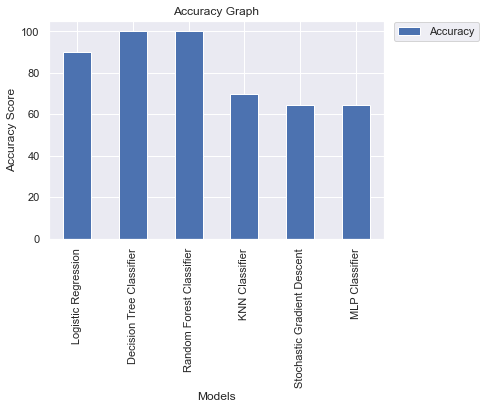

In [585]:
pd.DataFrame([float(i) for i in overview_acc.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
plt.legend(bbox_to_anchor=(1.3, 1.02))
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

#### After Performing Cross Validation 

In [586]:
pd.DataFrame(overview['Accuracy'])

,Accuracy
Logistic Regression,0.8571
Decision Tree Classifier,0.7714
Random Forest Classifier,0.8286
KNN Classifier,0.5571
Stochastic Gradient Descent,0.4714
MLP Classifier,0.5286


* We can observe that the accuracy has decreased after performing cross validation.
* The models that were previously overfitted (Decision Tree Classifier & Random Forest Classifier) has now been resolved. 
* The overall accuracy has been decreased, so we have to perform fine tuning to improve the model.

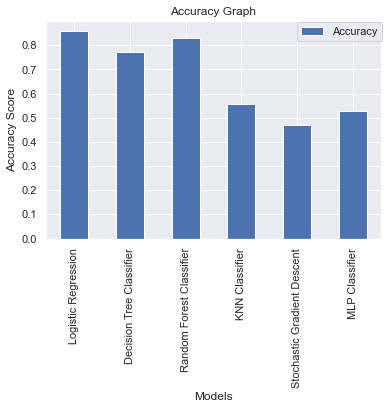

In [587]:
pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

### Classification Report

In [599]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    classifyReport(a, i)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

       False       0.83      0.76      0.79        25
        True       0.87      0.91      0.89        45

    accuracy                           0.86        70
   macro avg       0.85      0.84      0.84        70
weighted avg       0.86      0.86      0.86        70


Decision Tree Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       0.65      0.80      0.71        25
        True       0.87      0.76      0.81        45

    accuracy                           0.77        70
   macro avg       0.76      0.78      0.76        70
weighted avg       0.79      0.77      0.78        70


Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       0.81      0.68      0.74        25
        True       0.84      0.91      0.87        45

    accuracy                    

### Confusion Matrix 

In [600]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    confusionMatrix(a, i)

Logistic Regression
Confusion Matrix:
[[19  6]
 [ 4 41]]

Accuracy: 0.8571428571428571
TN, FP, FN, TP :  19 6 4 41


Decision Tree Classifier
Confusion Matrix:
[[20  5]
 [11 34]]

Accuracy: 0.7714285714285715
TN, FP, FN, TP :  20 5 11 34


Random Forest Classifier
Confusion Matrix:
[[17  8]
 [ 4 41]]

Accuracy: 0.8285714285714286
TN, FP, FN, TP :  17 8 4 41


KNN Classifier
Confusion Matrix:
[[ 3 22]
 [ 9 36]]

Accuracy: 0.5571428571428572
TN, FP, FN, TP :  3 22 9 36


Stochastic Gradient Descent
Confusion Matrix:
[[15 10]
 [27 18]]

Accuracy: 0.4714285714285714
TN, FP, FN, TP :  15 10 27 18


MLP Classifier
Confusion Matrix:
[[10 15]
 [18 27]]

Accuracy: 0.5285714285714286
TN, FP, FN, TP :  10 15 18 27




* The majority predicted of true positive are the Logistic Regression Classifier and Random Forest Classifier, but for the overall performance is belongs to the Logistic Regression Classifier.   
---

### Cross Validation Graph

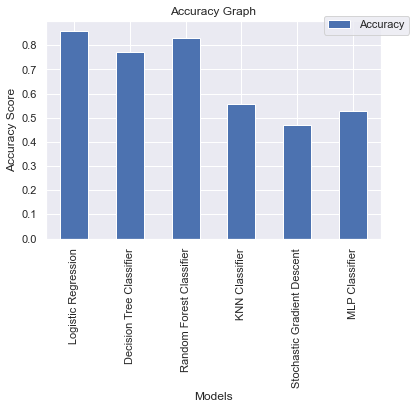

In [601]:
cv_sum()

### Overall Performance

In [602]:
overview

,Fit Time,Score Time,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.0389,0.0038,0.8571,0.8828,0.9111,0.8386
Decision Tree Classifier,0.0024,0.0040,0.7714,0.8762,0.7556,0.7608
Random Forest Classifier,0.1038,0.0116,0.8286,0.8545,0.9111,0.7958
KNN Classifier,0.0020,0.0043,0.5571,0.5895,0.8000,0.4087
Stochastic Gradient Descent,0.0026,0.0042,0.4714,0.2571,0.4000,0.3144
MLP Classifier,0.0153,0.0050,0.5286,0.3857,0.6000,0.3400


* Logistic Regression Classifier achieves an accuracy of 86% and f1 score of 83.9% which is the highest among all algorithms. Besides, its precision is also the highest among all algorithms. The recall of Logistic Regression Classifier is same as Random Forest Classifier, which is 91% and is the highest among all algorithms.


### Overall Performance Graph

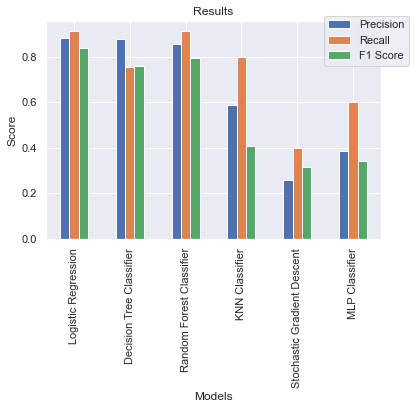

In [603]:
performance_sum()

* As can be observed from the graph, Logistic Regression Classifier has the best overall performance when compared with the other algorithms.

### Precision-Recall Curve

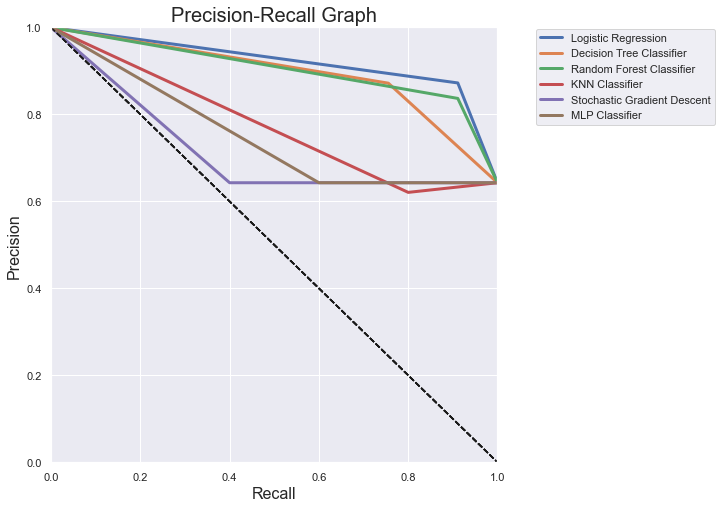

In [604]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_precision_vs_recall(y_pred_arr[clf[i]], i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.5, 1.01))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

* We can see that the Logistic Regression Classifier is the closest to the top right hand corner, while the Stochastic Gradient Descent Classifier is the most far away from the top right hand corner.
* Therefore, we can consider that the Logistic Regression Classifier is a good model for this dataset.

### ROC Curve

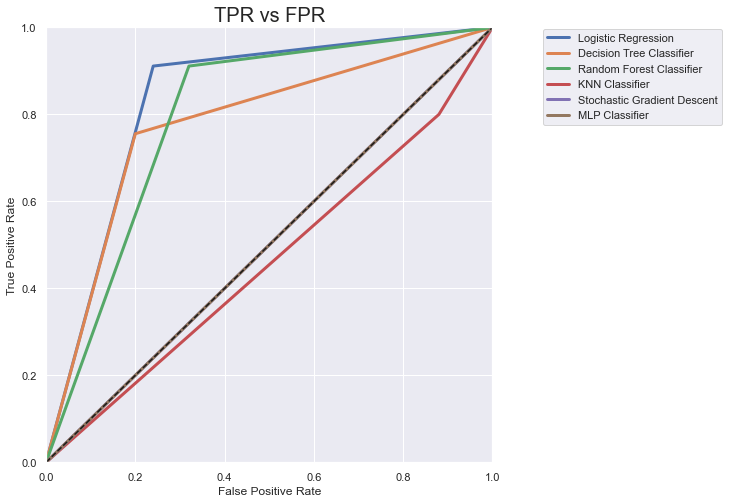

In [606]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_roc_curve(i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.01))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

* Again, the closest to the top left hand corner is belongs to the Logistic Regression Classifier, while the KNN Classifier is the worst classifier in this ROC curve.

### AUC Score

In [607]:
roc_auc_score_arr = [roc_auc_score(y_train, y_pred_arr[clf[i]]) for i in range(6)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

,AUC Score
Logistic Regression,0.835556
Decision Tree Classifier,0.777778
Random Forest Classifier,0.795556
KNN Classifier,0.460000
Stochastic Gradient Descent,0.500000
MLP Classifier,0.500000


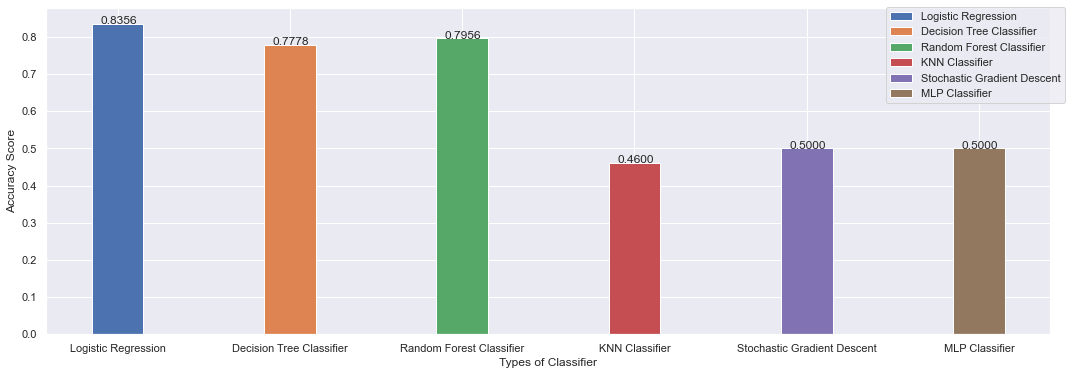

In [608]:
temp = auc_score_report["AUC Score"]
width = 0.3

fig, ax = plt.subplots(figsize=(18,6))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.bar(i,temp[i],width, label=overview.index[i])
    ax.text(i-0.10,temp[i],"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.02, 1.02))
plt.xticks(x1,overview.index)
plt.xlabel("Types of Classifier")
plt.ylabel("Accuracy Score")
plt.show()

* Logistic Regression Classifier has AUC score of 0.8356, which is the highest among all algorithms.
* Hence, we can conclude that out of all the algorithms, Logistic Regression Classifier can most accurately distinguish between classes.